In [4]:
using LinearAlgebra

struct Parm
    ξ::Float64
    β::Float64
    Ω::Float64
    t_step::Int
    H0::Hermitian{ComplexF64, Matrix{ComplexF64}}
    V::Hermitian{ComplexF64, Matrix{ComplexF64}}
    dt::Float64
end

function init_parm(parms::Vector)
    ξ = parms[1]
    β = parms[2]
    Ω = parms[3]
    t_step = parms[4]
    H0 = Hermitian([1.0 0; 0 -1.0])
    V = ξ * Hermitian([0 1.0; 1.0 0])
    dt = 2pi/Ω/t_step
    return Parm(ξ, β, Ω, t_step, H0, V, dt)
end

function calc_Udt_orig(p::Parm, old_Udt::Matrix{ComplexF64},t::Float64)
    newU = (Matrix(I, 2, 2) - 1.0im*(p.H0 + p.V*sin(p.Ω*t))*p.dt)*old_Udt
    newU = newU/sqrt((newU*newU')[1,1])
    return newU
end

function calc_Uf(p::Parm)
    U_norm = Matrix{ComplexF64}(I, 2, 2)
    for ti in 1:p.t_step
        U_norm = calc_Udt_orig(p, U_norm, ti*p.dt)
    end
    return U_norm
end

function init_ρ(p::Parm)
    ρ0 = Hermitian([exp(-p.β*p.H0[1,1]) 0.0; 0.0 exp(-p.β*p.H0[2,2])])/(exp(-p.β*p.H0[1,1])+exp(-p.β*p.H0[2,2]))
    return ρ0
end

function rho2beta(ρ)
    return 0.5*log(1/ρ-1)
end

using Plots

In [5]:
ξ_vec::Vector{Float64} = [0.05, 0.1, 0.2, 0.4, 0.8, 1.0]
    #[0.05, 0.1, 0.1*sqrt(2), 0.2, 0.2*sqrt(2), 0.4, 0.4*sqrt(2), 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0, 4.0, 5.0, 6.0]
T_size = 500
ave = 10
β_ave = zeros(Float64, length(ξ_vec), div(T_size, ave))
T_ave = zeros(Float64, length(ξ_vec), div(T_size, ave))
T0 = zeros(Float64, length(ξ_vec), T_size)
dTdt_ave = zeros(Float64, length(ξ_vec), div(T_size, ave)-1)
for i in 1:length(ξ_vec)
    ξ = ξ_vec[i]
    p = init_parm([ξ, 2.0, 10.0, 2000]) # ξ, β, Ω, t_step
    ρ0 = init_ρ(p)
    U0 = calc_Uf(p)
    ρ1 = zeros(Float64, T_size)
    for nt in 1:T_size
        ρ0 = U0 * ρ0 * U0'
        ρ1[nt] = real(ρ0[1,1])
    end
    βt = rho2beta.(ρ1)
    Tt = 1.0./βt
    T0[i,:] = Tt
    β_ave[i,:] = [sum(βt[ave*(n-1)+1:ave*n])/ave for n in 1:div(T_size,ave)]
    T_ave[i,:] = [sum(Tt[ave*(n-1)+1:ave*n])/ave for n in 1:div(T_size,ave)]
    dTdt_ave[i,:] = [(T_ave[i,n+1]-T_ave[i,n])/(ave*p.dt) for n in 1:div(T_size,ave)-1]
end

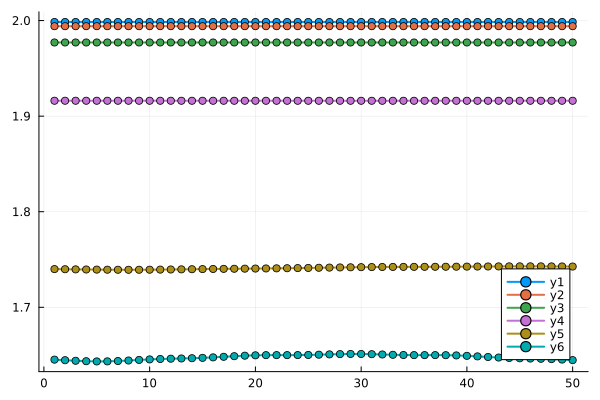

In [6]:
plot(β_ave', linewidth=2.0, marker=:circle)

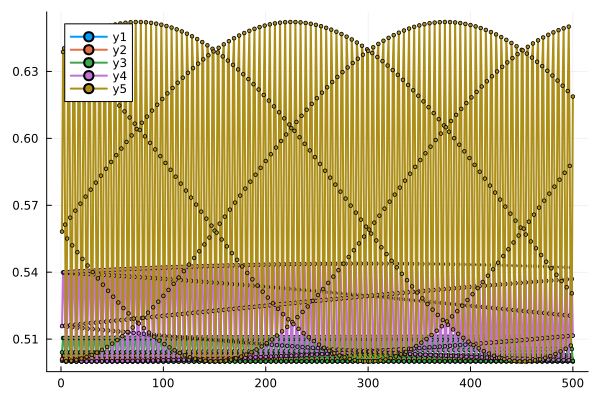

In [112]:
plot(T0[1:5,:]', linewidth=2.0, marker=:circle, ms=2.0)

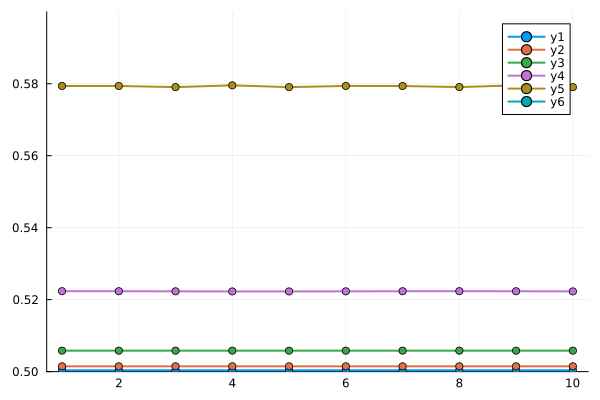

In [101]:
plot(T_ave', yrange=(0.5,0.6), linewidth=2.0, marker=:circle)

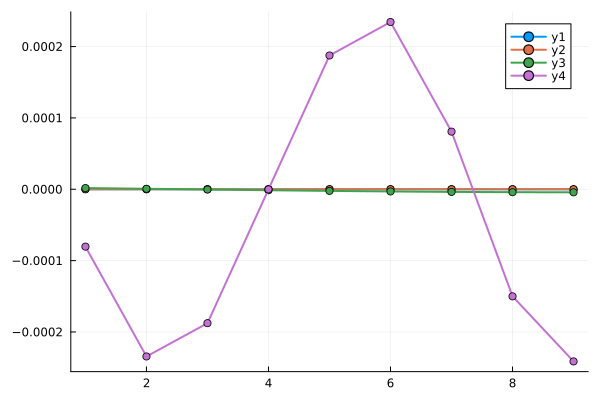

In [102]:
plot(dTdt_ave[1:4,:]', linewidth=2.0, marker=:circle)

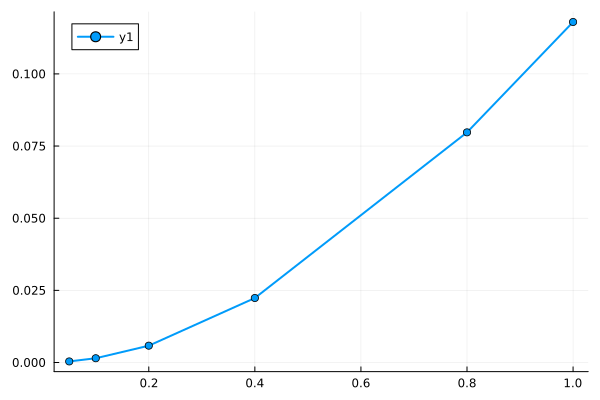

In [9]:
plot(ξ_vec, (T_ave[:,1].-0.5), linewidth=2.0, marker=:circle)

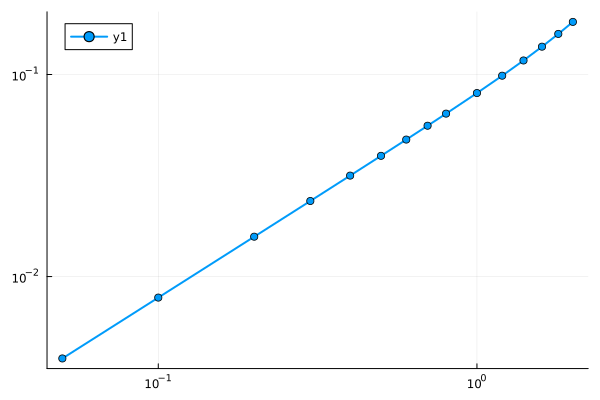

┌ Warning: No strict ticks found
└ @ PlotUtils /home/yoshihiro/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/yoshihiro/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/yoshihiro/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/yoshihiro/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/yoshihiro/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/yoshihiro/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/yoshihiro/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191


In [52]:
plot(ξ_vec, (T_ave[:,1].-1.0)./ξ_vec, scale=:log10, linewidth=2.0, marker=:circle)
